<a href="https://colab.research.google.com/github/RAFS20/Analisis-de-datos/blob/main/Analisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Función de análisis de datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import variation

# Configuración global para mostrar solo 2 decimales
import sys
sys.displayhook = lambda x: print(f'{round(x, 2):.2f}')
sns.set(style='white')
plt.rcParams.update({'font.family': 'Liberation Serif', 'font.size': 12})

def load_dataset(file_path):
    """
    Carga el dataset desde un archivo en formato CSV.
    
    Args:
        file_path (str): Ruta al archivo CSV.
    
    Returns:
        pd.DataFrame: El dataset cargado como un DataFrame de Pandas.
    """
    return pd.read_csv(file_path)

def summarize_dataset(dataset):
    """
    Muestra un resumen general del dataset, incluyendo información sobre el número de filas y columnas.
    
    Args:
        dataset (pd.DataFrame): El dataset a resumir.
    """
    print("Resumen del Dataset:")
    print("Número de filas:", dataset.shape[0])
    print("Número de columnas:", dataset.shape[1])
    print()

def analyze_missing_values(dataset):
    """
    Analiza los valores faltantes en el dataset y muestra un resumen.
    
    Args:
        dataset (pd.DataFrame): El dataset a analizar.
    """
    missing_values = dataset.isnull().sum()
    print("Valores faltantes por columna:")
    print(missing_values)
    print()

def analyze_numerical_variables(dataset, save_path):
    """
    Realiza un análisis de las variables numéricas del dataset y muestra estadísticas descriptivas.
    También grafica histogramas y gráficos de torta para cada variable numérica y guarda los gráficos en la carpeta indicada.
    
    Args:
        dataset (pd.DataFrame): El dataset a analizar.
        save_path (str): Ruta de la carpeta donde se guardarán los gráficos.
    """
    numeric_columns = dataset.select_dtypes(include=[np.number])
    if len(numeric_columns) > 0:
        print("Variables numéricas:")
        print(numeric_columns.describe())
        print()

        os.makedirs(save_path, exist_ok=True)  # Crear la carpeta si no existe

        # Graficar histogramas y gráficos de torta para cada variable numérica y guardar los gráficos
        for column in numeric_columns:
            plt.figure(figsize=(12, 4))

            # Histograma
            plt.subplot(1, 2, 1)
            sns.histplot(data=dataset, x=column, kde=True)
            plt.axvline(dataset[column].median(), color='red', linestyle='--', label=f'Mediana: {dataset[column].median():.2f}')
            plt.axvline(dataset[column].mean(), color='green', linestyle='--', label=f'Media: {dataset[column].mean():.2f} CV: {(dataset[column].std() / dataset[column].mean() * 100):.2f}%')
            plt.xlabel(column)
            plt.ylabel('Frecuencia')
            plt.title('Histograma de ' + column)
            plt.legend()

            # Gráfico de torta con rangos
            plt.subplot(1, 2, 2)
            ranges = pd.qcut(dataset[column], q=5)  # Dividir la variable en 5 rangos
            range_counts = ranges.value_counts(normalize=True)

            # Convertir los intervalos en etiquetas legibles y limitarlos a 2 decimales
            labels = [f'{interval.left:.2f} - {interval.right:.2f}' for interval in range_counts.index]

            # Configurar el formato de los valores en el gráfico de torta
            plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda value, _: '{:.2%}'.format(value)))

            plt.pie(range_counts, labels=labels, autopct='%.2f%%', startangle=90)
            plt.title('Gráfico de Torta - Rangos de ' + column)

            plt.suptitle('Análisis de ' + column, y=1.05)
            plt.tight_layout()
            plt.savefig(os.path.join(save_path, 'analisis_' + column + '.svg'), format='svg')
            plt.show()

        print()
    else:
        print("No se encontraron variables numéricas en el dataset.")
        print()

def analyze_categorical_variables(dataset, save_path):
    """
    Realiza un análisis de las variables categóricas del dataset y muestra estadísticas descriptivas.
    También grafica gráficos de torta y gráficos de barras para cada variable categórica y guarda los gráficos en la carpeta indicada.
    
    Args:
        dataset (pd.DataFrame): El dataset a analizar.
        save_path (str): Ruta de la carpeta donde se guardarán los gráficos.
    """
    categorical_columns = dataset.select_dtypes(include=['object', 'category'])
    if len(categorical_columns) > 0:
        print("Variables categóricas:")
        for column in categorical_columns:
            print("Columna:", column)
            print("Valores únicos:", dataset[column].unique())
            print("Frecuencia de valores:")
            print(dataset[column].value_counts())
            print("Proporción de valores:")
            proportions = dataset[column].value_counts(normalize=True).map('{:.2%}'.format)
            print(proportions)
            print()

            os.makedirs(save_path, exist_ok=True)  # Crear la carpeta si no existe

            # Graficar gráficos de torta y gráficos de barras para cada variable categórica y guardar los gráficos
            plt.figure(figsize=(12, 4))

            # Gráfico de torta
            plt.subplot(1, 2, 1)
            category_counts = dataset[column].value_counts(normalize=True)
            plt.pie(category_counts, labels=category_counts.index, autopct='%.2f%%', startangle=90)
            plt.title('Gráfico de Torta - ' + column)

            # Gráfico de barras
            plt.subplot(1, 2, 2)
            bar_counts = dataset[column].value_counts()
            plt.bar(bar_counts.index.astype(str), bar_counts.values)
            plt.xlabel(column)
            plt.ylabel('Frecuencia')
            plt.title('Gráfico de Barras - ' + column)
            plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda value, _: '{:.2f}'.format(value)))

            plt.suptitle('Análisis de ' + column, y=1.05)
            plt.tight_layout()
            plt.savefig(os.path.join(save_path, 'analisis_' + column + '.svg'), format='svg')
            plt.show()

    else:
        print("No se encontraron variables categóricas en el dataset.")
        print()

def combine_categorical_numerical_variables(dataset, save_path):
    """
    Combina todas las variables categóricas con todas las variables numéricas en gráficos y guarda los gráficos en archivos .svg
    en la carpeta indicada.
    
    Args:
        dataset (pd.DataFrame): El dataset a analizar.
        save_path (str): Ruta de la carpeta donde se guardarán los gráficos.
    """
    os.makedirs(save_path, exist_ok=True)  # Crear la carpeta si no existe

    categorical_columns = dataset.select_dtypes(include=['object', 'category'])
    numeric_columns = dataset.select_dtypes(include=[np.number])

    if len(categorical_columns) > 0 and len(numeric_columns) > 0:
        for cat_column in categorical_columns:
            for num_column in numeric_columns:
                plt.figure(figsize=(12, 6))
                
                # Boxplot
                plt.subplot(1, 3, 1)
                sns.boxplot(data=dataset, x=cat_column, y=num_column)
                median_values = dataset.groupby(cat_column)[num_column].median()
                for i, median in enumerate(median_values):
                    plt.text(i, median, f'{median:.2f}', horizontalalignment='center', color='white', weight='bold')
                plt.xlabel(cat_column)
                plt.ylabel(num_column)
                plt.title(f'Boxplot de {num_column} por {cat_column}')
                plt.xticks(rotation=45)
                
                # Histogramas
                plt.subplot(1, 3, 2)
                for category in dataset[cat_column].unique():
                    sns.kdeplot(data=dataset[dataset[cat_column] == category], x=num_column, label=str(category), linewidth=2)
                median_line_values = dataset.groupby(cat_column)[num_column].median()
                for i, median in enumerate(median_line_values):
                    plt.axvline(median, color=sns.color_palette()[i], linestyle='--', linewidth=2)
                plt.xlabel(num_column)
                plt.ylabel('Densidad')
                plt.title(f'Histograma de {num_column} por {cat_column}')
                plt.legend()

                # Gráfico de barras apiladas
                plt.subplot(1, 3, 3)
                ranges = pd.qcut(dataset[num_column], q=5)  # Dividir la variable en 5 rangos
                range_labels = [f'{interval.left:.2f} - {interval.right:.2f}' for interval in pd.Categorical(ranges).categories]  # Convertir intervalos en etiquetas legibles
                stacked_counts = dataset.groupby([ranges, cat_column]).size().unstack().apply(lambda x: x / x.sum(), axis=1)
                stacked_counts.plot(kind='bar', stacked=True, ax=plt.gca())
                plt.xlabel('Rango de ' + num_column)
                plt.ylabel('Porcentaje')
                plt.title(f'Gráfico de Barras - Rangos de {num_column} divididos por {cat_column}')
                plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda value, _: '{:.2%}'.format(value)))

                # Agregar etiquetas de datos porcentuales en las barras apiladas
                for rect in plt.gca().patches:
                    width = rect.get_width()
                    height = rect.get_height()
                    x = rect.get_x()
                    y = rect.get_y()
                    label_text = f'{height:.0%}'  # Eliminar decimales en las etiquetas de datos porcentuales
                    label_x = x + width / 2
                    label_y = y + height / 2
                    plt.text(label_x, label_y, label_text, ha='center', va='center')
                    
                plt.xticks(range(len(range_labels)), range_labels, rotation=45)  # Usar las etiquetas legibles en el eje x

                plt.suptitle(f'Análisis de {num_column} por {cat_column}', y=1.05)
                plt.tight_layout()
                plt.savefig(os.path.join(save_path, f'analisis_{num_column}_por_{cat_column}.svg'), format='svg')
                plt.show()
    else:
        print("No se encontraron variables categóricas o numéricas en el dataset.")
        print()


def analyze_dataset(dataset):
    """
    Realiza un análisis del dataset, incluyendo un resumen general, análisis de valores faltantes,
    análisis de variables numéricas, análisis de variables categóricas y combinación de variables categóricas y numéricas.
    Guarda los gráficos en carpetas separadas.
    
    Args:
        dataset (pd.DataFrame): El dataset a analizar.
    """
    summarize_dataset(dataset)
    analyze_missing_values(dataset)
    analyze_numerical_variables(dataset, 'variables_numericas')
    analyze_categorical_variables(dataset, 'variables_categoricas')
    combine_categorical_numerical_variables(dataset, 'graficos_combinados')


In [ ]:
import pandas as pd
import numpy as np

# Definir el tamaño del dataset
num_rows = 100

# Definir las columnas y tipos de variables
columns = ['ID', 'Age', 'Height', 'Weight', 'Income', 'Category', 'Variable1', 'Variable2']
dtypes = [np.int64, np.int64, np.float64, np.float64, np.float64, 'category', 'category', 'category']

# Generar datos simulados
data = {
    'ID': np.arange(num_rows),
    'Age': np.random.randint(18, 65, size=num_rows),
    'Height': np.random.normal(170, 10, size=num_rows),
    'Weight': np.random.normal(65, 12, size=num_rows),
    'Income': np.random.uniform(20000, 100000, size=num_rows),
    'Category': np.random.choice(['A', 'B', 'C'], size=num_rows),
    'Variable1': np.random.choice(['X', 'Y', 'Z'], size=num_rows),
    'Variable2': np.random.choice(['P', 'Q', 'R'], size=num_rows)
}

# Crear el DataFrame
df = pd.DataFrame(data, columns=columns).astype(dict(zip(columns, dtypes)))

# Mostrar el DataFrame
print(df.head())


   ID  Age      Height     Weight        Income Category Variable1 Variable2
0   0   39  179.457567  55.067673  64958.633521        C         Y         R
1   1   19  162.531479  39.703771  22888.558871        B         X         P
2   2   49  180.732365  77.181907  34610.910315        C         Y         Q
3   3   61  174.876777  44.248943  82554.848214        C         X         R
4   4   63  171.418189  86.661678  30528.763231        C         Y         P


Resumen del Dataset:
Número de filas: 100
Número de columnas: 8

Valores faltantes por columna:
ID           0
Age          0
Height       0
Weight       0
Income       0
Category     0
Variable1    0
Variable2    0
dtype: int64

Variables numéricas:
               ID         Age      Height      Weight        Income
count  100.000000  100.000000  100.000000  100.000000    100.000000
mean    49.500000   41.450000  169.336603   64.646621  56484.837862
std     29.011492   13.796775   10.023450   13.899970  22985.496400
min      0.000000   18.000000  143.652700   32.411737  21426.682405
25%     24.750000   30.000000  162.741201   55.004609  34546.436494
50%     49.500000   41.500000  170.793123   65.064936  58024.986355
75%     74.250000   52.250000  177.533646   75.028300  74128.082934
max     99.000000   64.000000  186.407160   99.622787  99046.766902



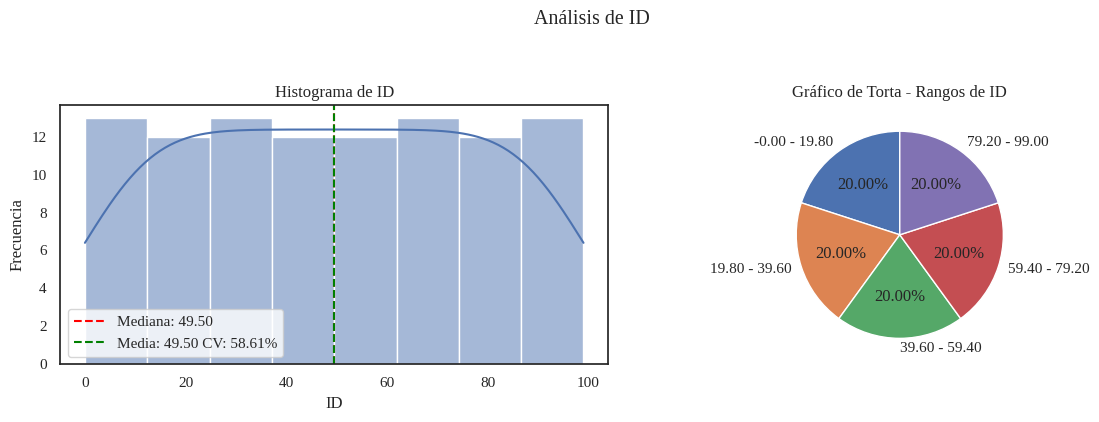

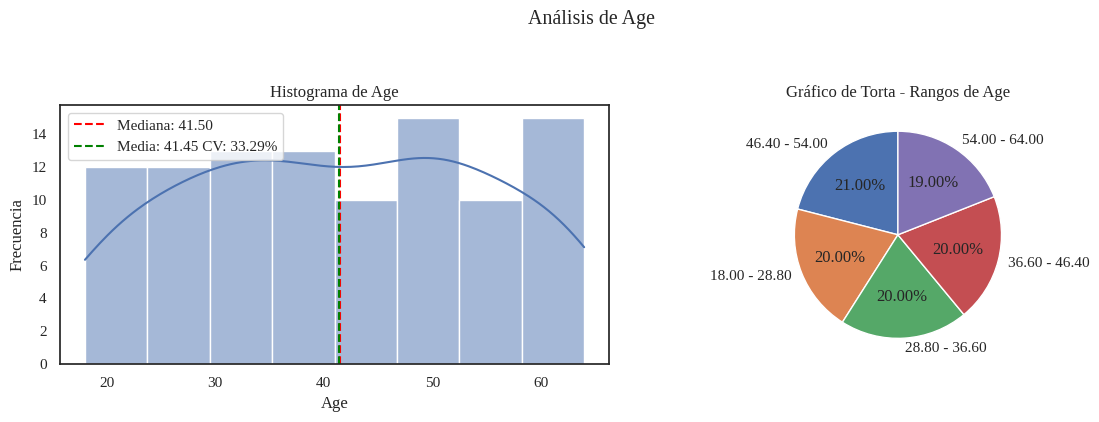

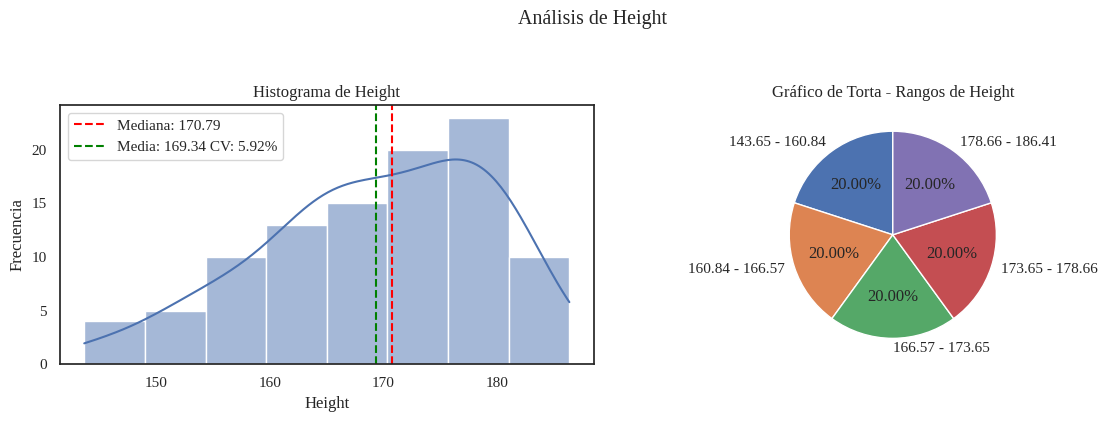

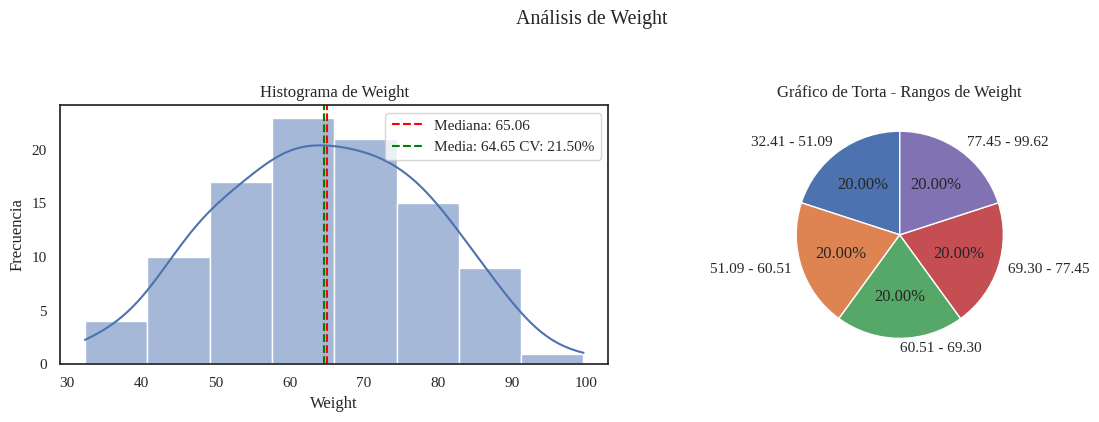

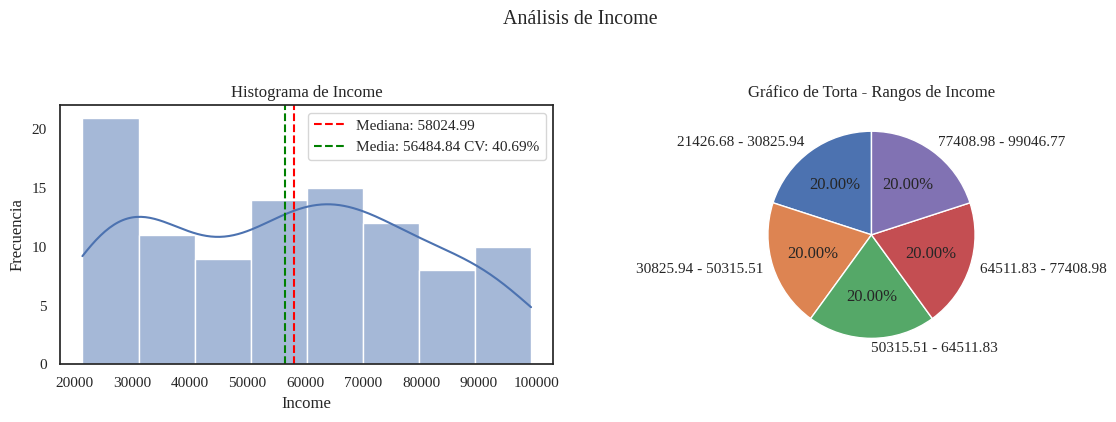


Variables categóricas:
Columna: Category
Valores únicos: ['C', 'B', 'A']
Categories (3, object): ['A', 'B', 'C']
Frecuencia de valores:
C    38
A    31
B    31
Name: Category, dtype: int64
Proporción de valores:
C    38.00%
A    31.00%
B    31.00%
Name: Category, dtype: object



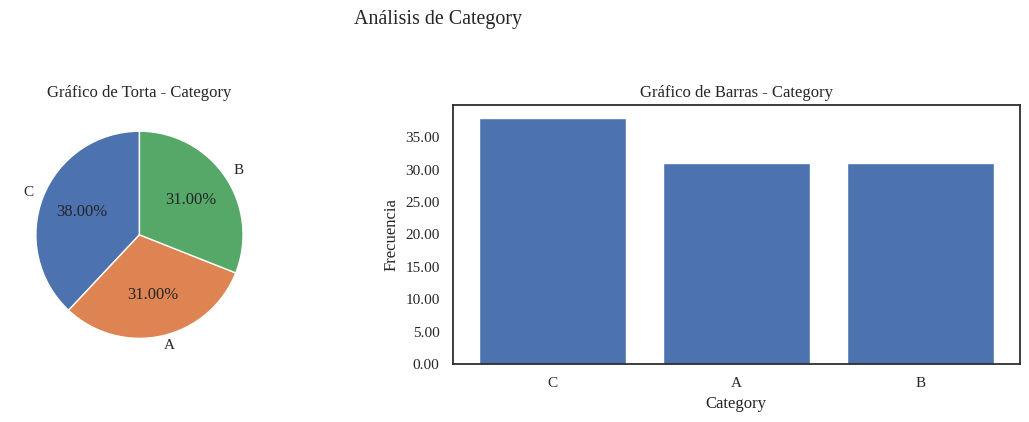

Columna: Variable1
Valores únicos: ['Y', 'X', 'Z']
Categories (3, object): ['X', 'Y', 'Z']
Frecuencia de valores:
Z    41
Y    34
X    25
Name: Variable1, dtype: int64
Proporción de valores:
Z    41.00%
Y    34.00%
X    25.00%
Name: Variable1, dtype: object



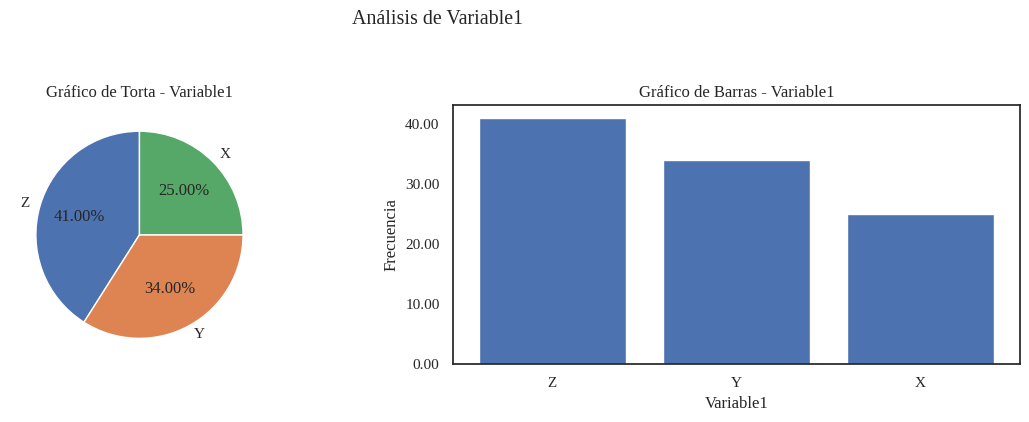

Columna: Variable2
Valores únicos: ['R', 'P', 'Q']
Categories (3, object): ['P', 'Q', 'R']
Frecuencia de valores:
R    39
P    32
Q    29
Name: Variable2, dtype: int64
Proporción de valores:
R    39.00%
P    32.00%
Q    29.00%
Name: Variable2, dtype: object



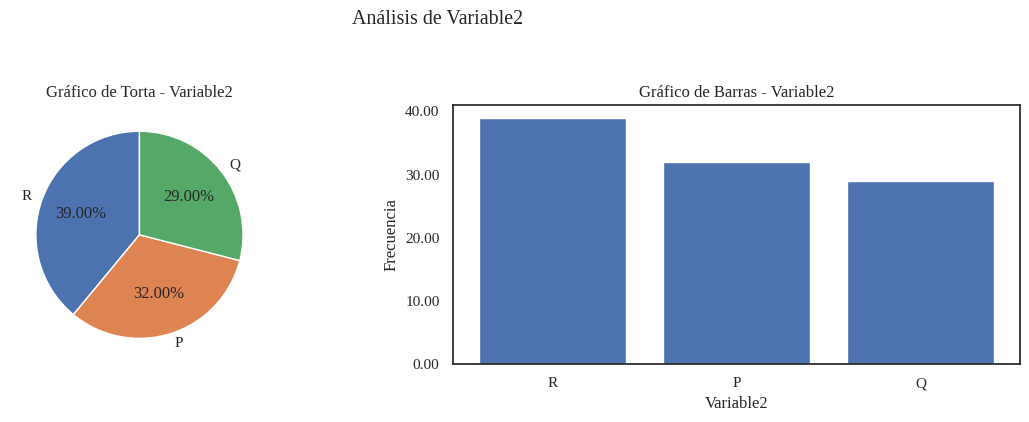

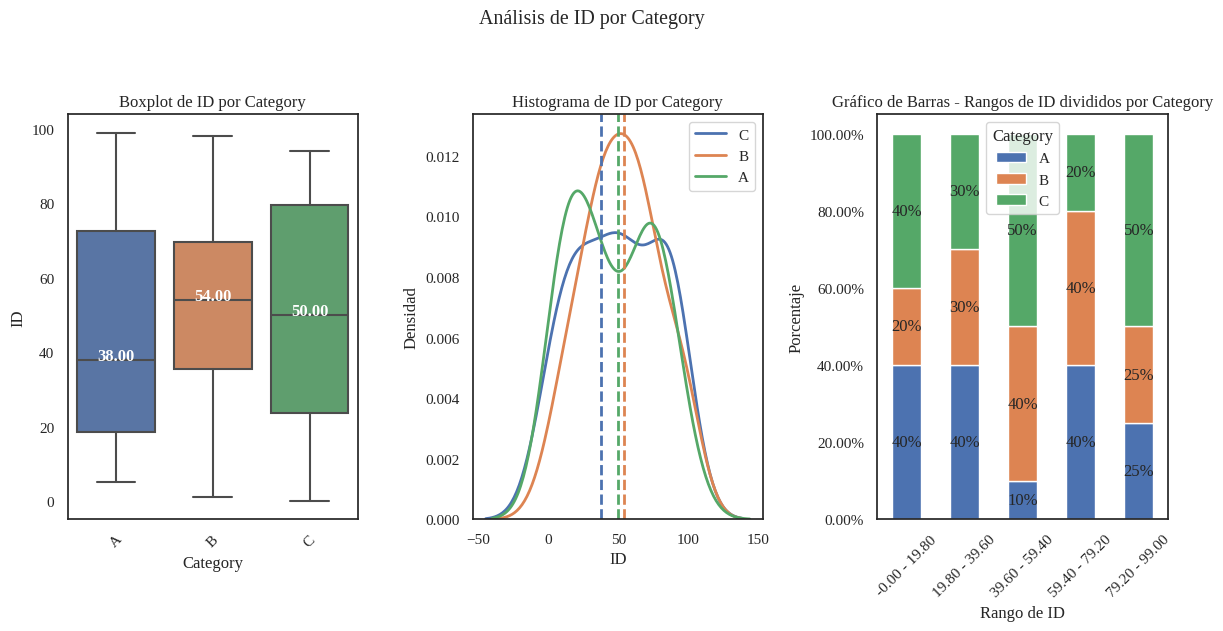

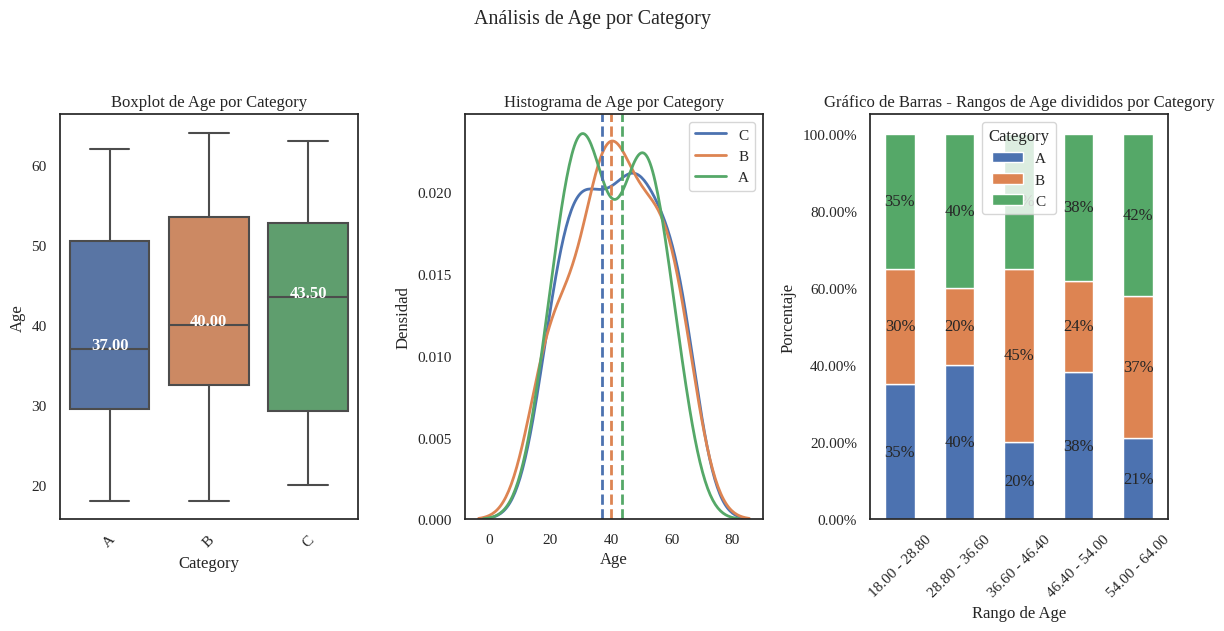

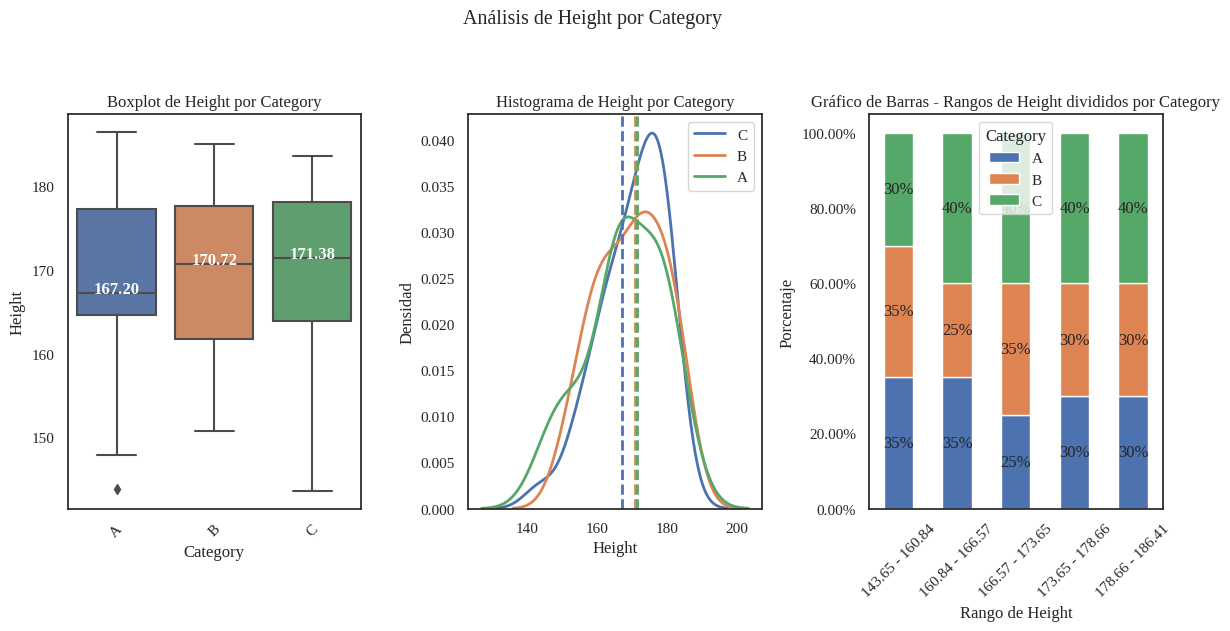

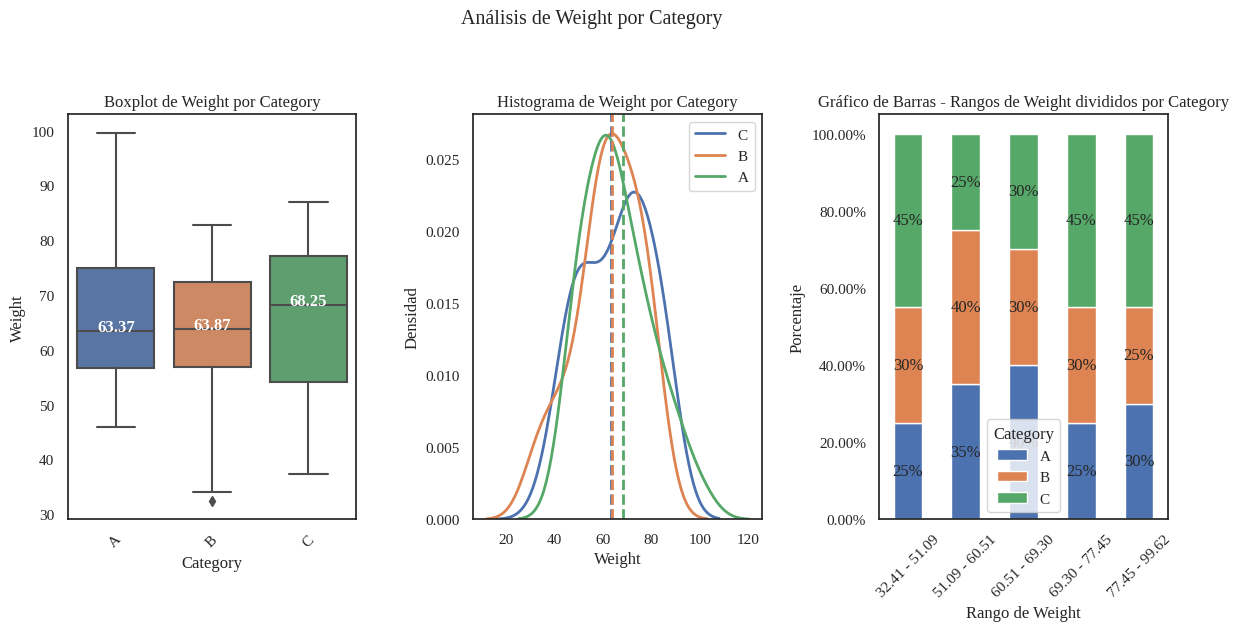

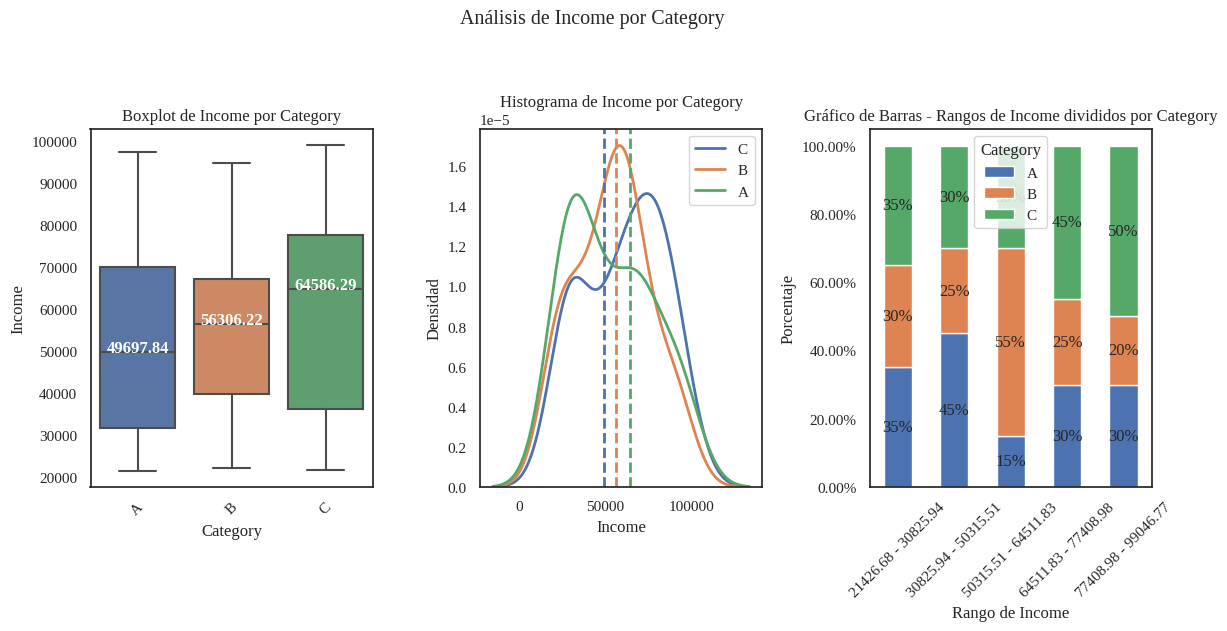

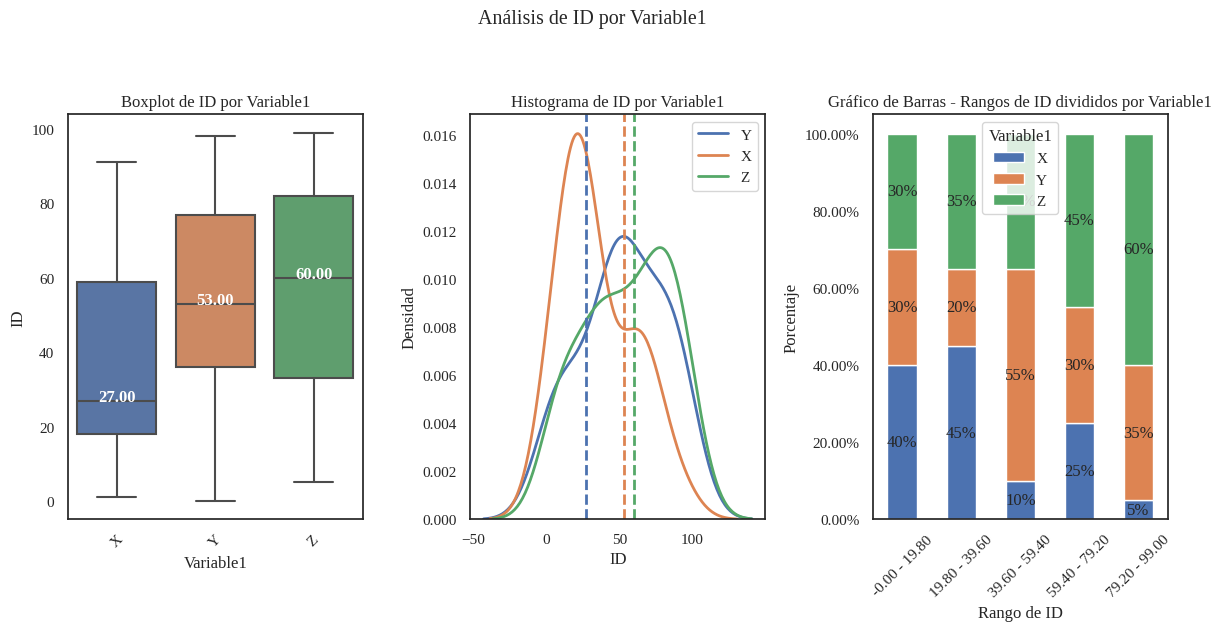

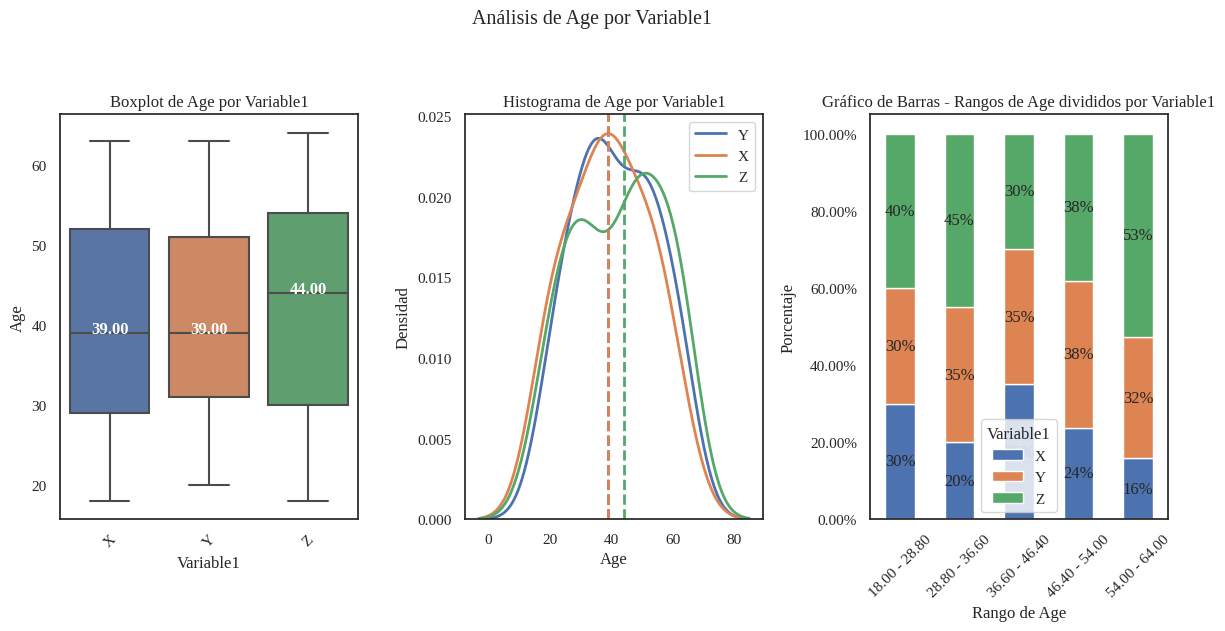

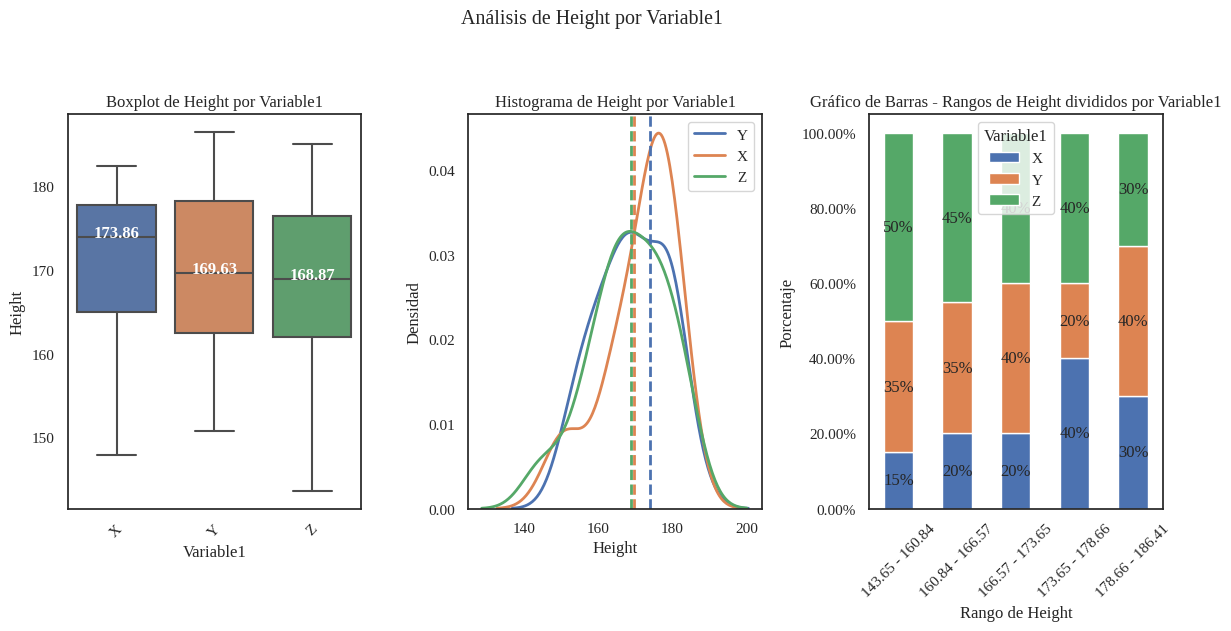

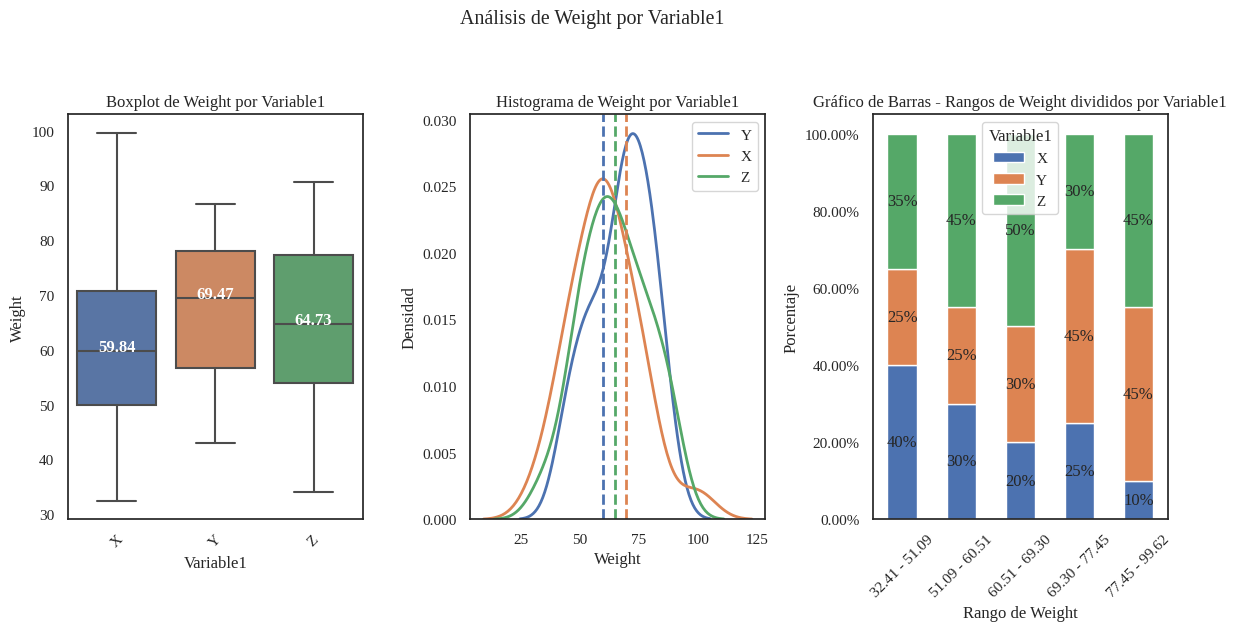

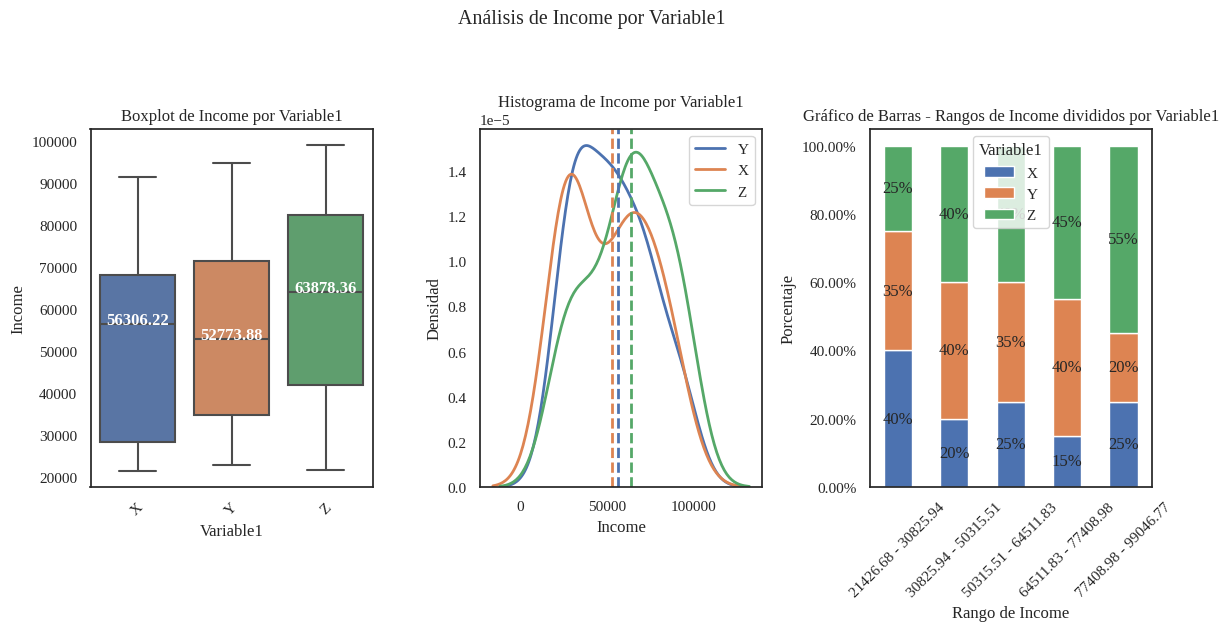

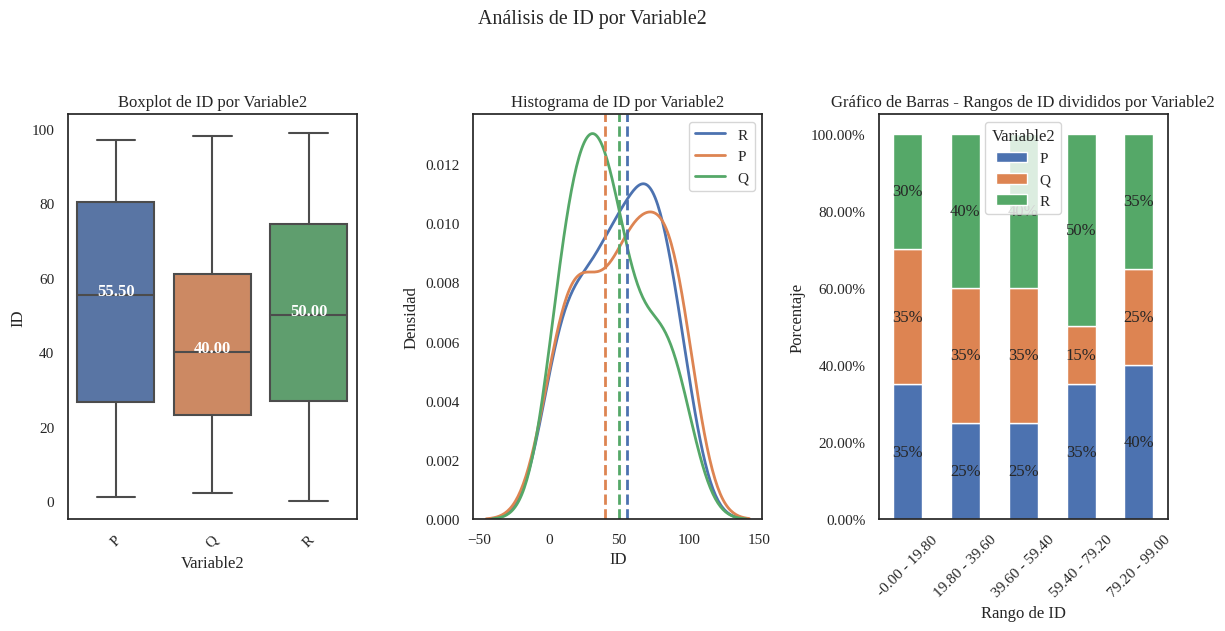

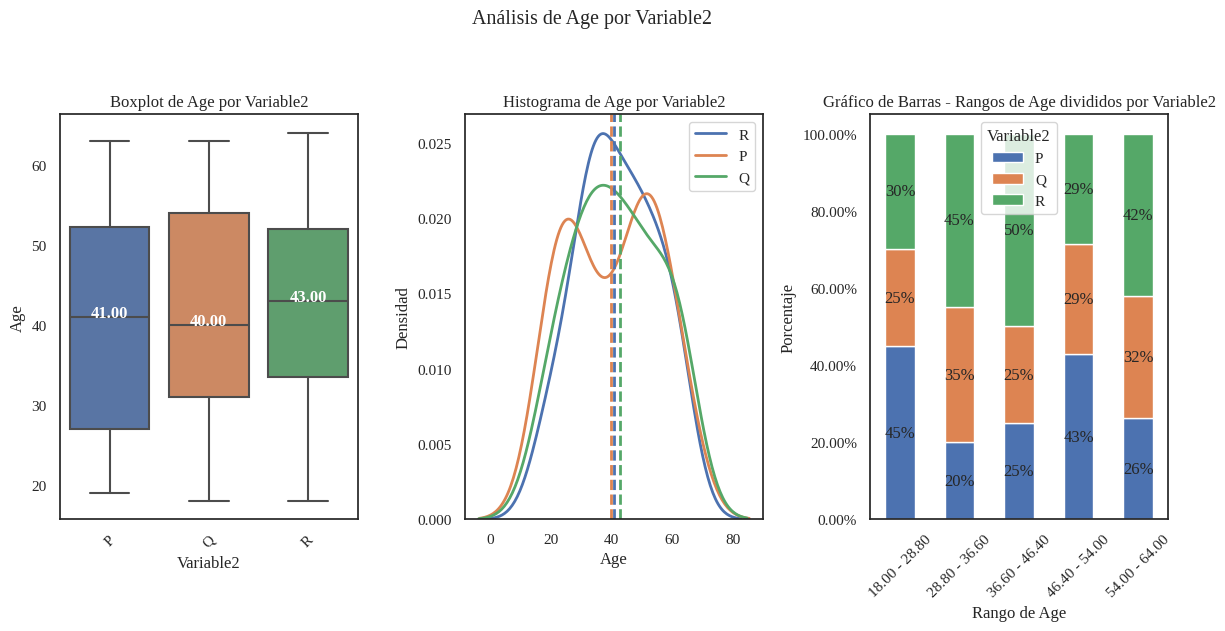

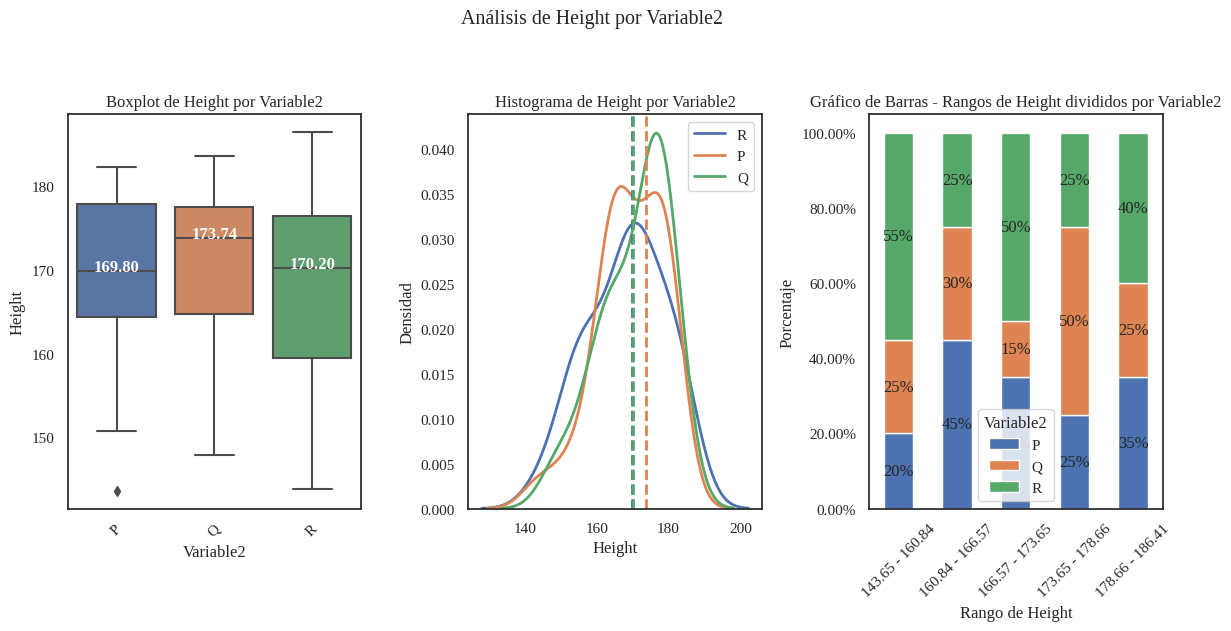

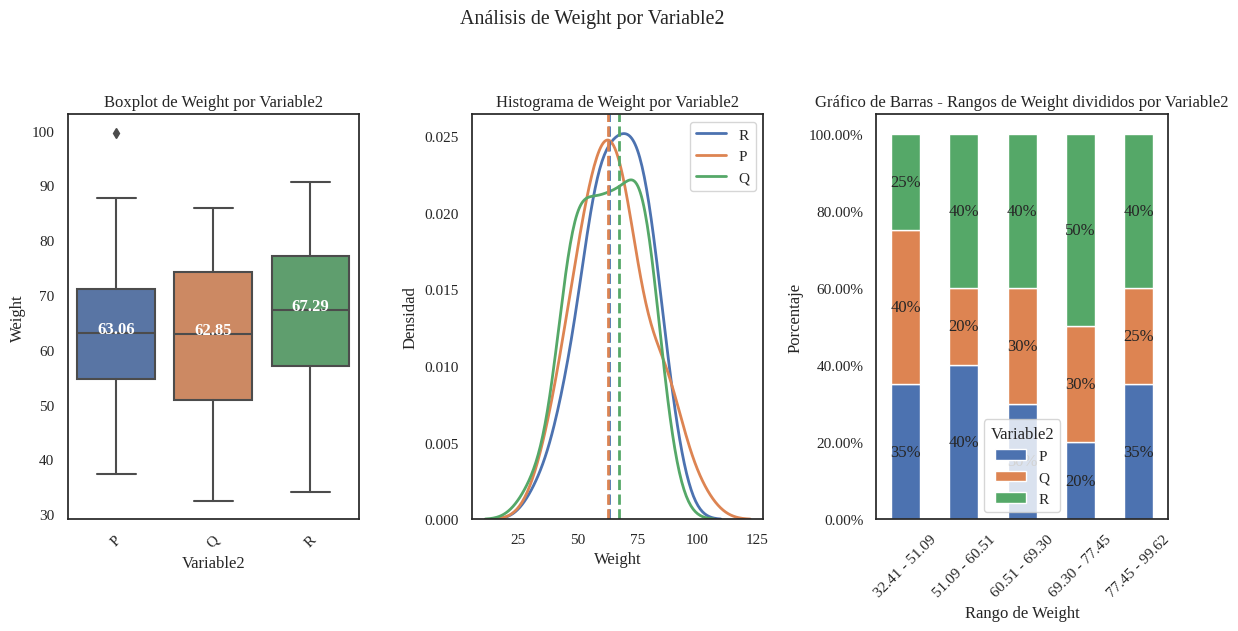

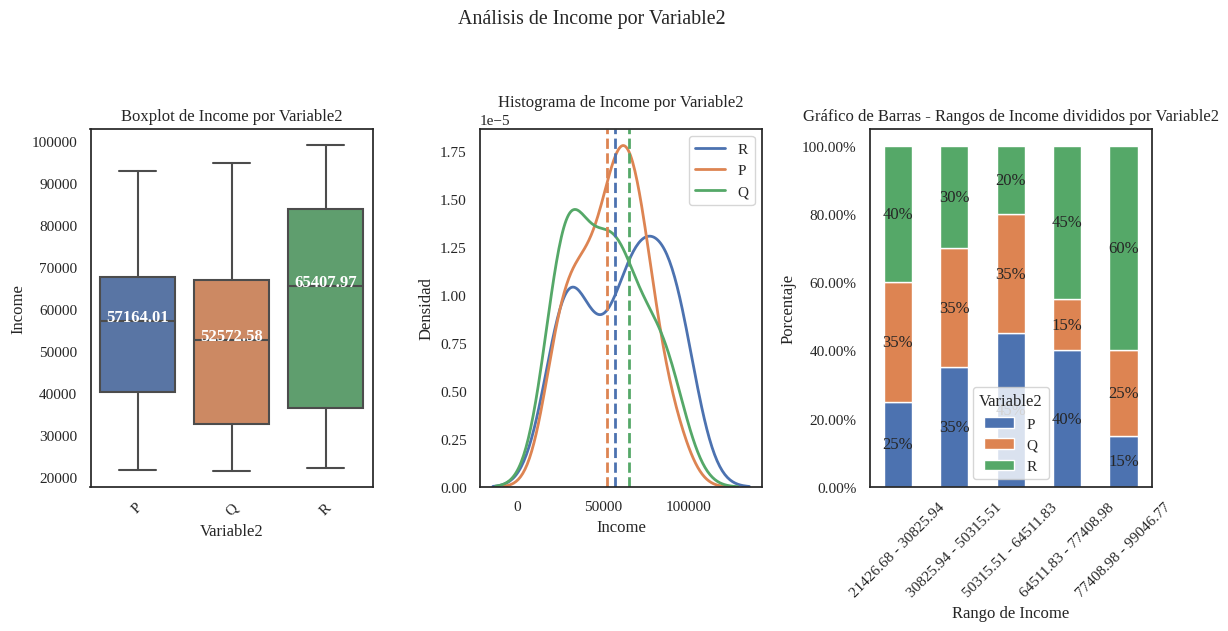

In [ ]:
analyze_dataset(df)